In [2]:
import pandas as pd

import ijson

In [3]:
! ll /mnt/data/maca-facs-sourmash_compute_all | head

/bin/sh: 1: ll: not found


In [4]:
ll /mnt/data/sourmash_index_1000cell | head

total 3720
drwxrwxr-x 3 ubuntu 4096 Sep 15 01:14 trim=false_scaled=1000_dna_ksize=12/
drwxrwxr-x 3 ubuntu 4096 Sep 15 01:14 trim=false_scaled=1000_dna_ksize=15/
drwxrwxr-x 3 ubuntu 4096 Sep 15 01:14 trim=false_scaled=1000_dna_ksize=18/
drwxrwxr-x 3 ubuntu 4096 Sep 15 01:15 trim=false_scaled=1000_dna_ksize=21/
drwxrwxr-x 3 ubuntu 4096 Sep 15 01:15 trim=false_scaled=1000_dna_ksize=24/
drwxrwxr-x 3 ubuntu 4096 Sep 15 01:15 trim=false_scaled=1000_dna_ksize=27/
drwxrwxr-x 3 ubuntu 4096 Sep 15 01:15 trim=false_scaled=1000_dna_ksize=3/
drwxrwxr-x 3 ubuntu 4096 Sep 15 01:15 trim=false_scaled=1000_dna_ksize=30/
drwxrwxr-x 3 ubuntu 4096 Sep 15 01:16 trim=false_scaled=1000_dna_ksize=33/
ls: write error


In [5]:
import json

In [6]:
filename = '/mnt/data/maca-facs-sourmash_compute_all/A10-B000126-3_39_F-1-1.sig'
with open(filename) as f:
    signatures = json.load(f)

In [7]:
signature = signatures[0]
signature.keys()

dict_keys(['class', 'email', 'filename', 'hash_function', 'license', 'name', 'signatures', 'version'])

In [8]:
signature['class']

'sourmash_signature'

In [9]:
signature['version']

0.4

In [10]:
for sig in signature['signatures']:
    print('---')
    for key, value in sig.items():
        print(f'{key}:')
        if isinstance(value, list):
            print(f'\tlength: {len(value)}')
        else:
            print(f'\tvalue: {value}')
#     print(sig.keys())

---
abundances:
	length: 8471
ksize:
	value: 21
max_hash:
	value: 18446744073709552
md5sum:
	value: 44795c8eb2dabc07025cc1da1ab156c7
mins:
	length: 8471
molecule:
	value: protein
num:
	value: 0
seed:
	value: 42
---
abundances:
	length: 4593
ksize:
	value: 21
max_hash:
	value: 18446744073709552
md5sum:
	value: dc46c785cb3f9941c5ce9e6b385d94a1
mins:
	length: 4593
molecule:
	value: DNA
num:
	value: 0
seed:
	value: 42
---
abundances:
	length: 8920
ksize:
	value: 27
max_hash:
	value: 18446744073709552
md5sum:
	value: 0ba559fc0195b062424078cc850219c0
mins:
	length: 8920
molecule:
	value: protein
num:
	value: 0
seed:
	value: 42
---
abundances:
	length: 4769
ksize:
	value: 27
max_hash:
	value: 18446744073709552
md5sum:
	value: 2d4dc3de2ce5e9624bf28894f5814516
mins:
	length: 4769
molecule:
	value: DNA
num:
	value: 0
seed:
	value: 42
---
abundances:
	length: 9175
ksize:
	value: 33
max_hash:
	value: 18446744073709552
md5sum:
	value: e958290cd70d5d3191d394c7aae37e0b
mins:
	length: 9175
molecule:
	

In [11]:
keys_for_length = ('mins',)

keys_for_values = ('ksize', 'molecule')

keys_to_print = keys_for_length + keys_for_values

def summarize(signature):
    data = []
    for sig in signature['signatures']:
        d = dict(name=signature['name'])
        for key, value in sig.items():
            if key not in keys_to_print:
                continue

            if key in keys_for_length:
                v = len(value)
                k = 'n_' + key
            elif key in keys_for_values:
                v = value
                k = key
            d[k] = v
        data.append(d)
    return data

In [12]:
pd.DataFrame(summarize(signature))

,ksize,molecule,n_mins,name
0,21,protein,8471,cell_ontology_class:keratinocyte_stem_cell|tis...
1,21,DNA,4593,cell_ontology_class:keratinocyte_stem_cell|tis...
2,27,protein,8920,cell_ontology_class:keratinocyte_stem_cell|tis...
3,27,DNA,4769,cell_ontology_class:keratinocyte_stem_cell|tis...
4,33,protein,9175,cell_ontology_class:keratinocyte_stem_cell|tis...
5,33,DNA,4755,cell_ontology_class:keratinocyte_stem_cell|tis...
6,51,protein,8755,cell_ontology_class:keratinocyte_stem_cell|tis...
7,51,DNA,4444,cell_ontology_class:keratinocyte_stem_cell|tis...


In [13]:
del signature

In [14]:
pd.options.display.max_columns = 500
pd.options.display.max_colwidth = 500

In [15]:
%%timeit

import glob

from sourmash.signature import load_signatures
import itertools


globber = '/mnt/data/maca-facs-sourmash_compute_all/A12-*.sig'

data = []

for i, filename in zip(range(5), glob.iglob(globber)):
    with open(filename) as f:
        signature = json.load(f)
    summary = itertools.chain(*map(summarize, signature))
    data.extend(summary)
pd.DataFrame(data)

142 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
from tqdm import tqdm

In [ ]:
# %%timeit

import glob

from sourmash.signature import load_signatures
import itertools


globber = '/mnt/data/maca-facs-sourmash_compute_all/*.sig'

data = []

for filename in tqdm(glob.iglob(globber)):
    with open(filename) as f:
        signature = json.load(f)
    summary = itertools.chain(*map(summarize, signature))
    data.extend(summary)
signature_summaries = pd.DataFrame(data)
print(signature_summaries.shape)
signature_summaries.head()

7817it [11:39, 11.17it/s]

In [16]:
# 50,000 samples
145 * 50000

7250000

In [17]:
# divide by 1000 for miliseconds, divide by 60 for minutes
7250000/1000/60

120.83333333333333

## Try using ijson for speed

In [38]:
# %%timeit

import glob

from sourmash.signature import load_signatures
import itertools

keys_for_length = ('mins',)

keys_for_values = ('ksize', 'molecule', 'name')

keys_to_print = keys_for_length + keys_for_values


final_keys = ('n_kmers',) + keys_for_values

def _read_stream(prefix, event, value):
    pass

def summarize_stream(parser):
    data = []
    n_abundances = 0
#     max_abundances = 5
    print('-------------------')
    map_key = None
    map_value = 0
    d = {}
    for prefix, event, value in parser:
        if value == "ksize":
            print(f'\tksize!!! prefix: {prefix}, event: {event}, value: {value}')
        
        if event == "start_array":
            print('---- start array ----')
            print(f'prefix: {prefix}, event: {event}, value: {value}')
        if event == "end_array":
            print(f'prefix: {prefix}, event: {event}, value: {value}')
            print('---- end array ----')
            print(f'map_key: {map_key}')
            print(f'map_value: {map_value}')
            if map_key == 'n_kmers':
                d[map_key] = map_value
                print(f"\tassigned {map_key}: {map_value}")
                print(f'\td, {d}')
                map_key = None
                map_value = 0
        if 'mins' in prefix and event == "number":
            map_value += 1
#             print("incremented map value")
#         print(f'\tprefix: "{prefix}"\tevent: "{event}"\tvalue: {value}')
        
        
        # If the minimum hash value list has ended

        
        # if this is one of the keys we care about
        if event == 'map_key':
            if value in keys_to_print:
                map_key = value
                if map_key == 'mins':
                    map_key = 'n_kmers'
#                 print(f'map_key: {map_key}')
                    
        # if previous thing was a key
        if event != 'map_key' and map_key is not None:
            if map_key in keys_for_values:
                map_value = value
                d[map_key] = map_value
                print(f"\tassigned {map_key}: {map_value}")
                print(f'\td, {d}')
                map_key = None
                map_value = 0
                
        if all(k in d.keys() for k in final_keys):
            data.append(d)
            print('\t\t--- appended to data')
            d = {}
            map_value = 0
            map_key = None
            
    print(f'data, {data}')
    return data


globber = '/mnt/data/maca-facs-sourmash_compute_all/A12-*.sig'

data = []

for i, filename in zip(range(2), glob.iglob(globber)):
    with open(filename) as f:
        parser = ijson.parse(f)
#         for prefix, event, value in parser:
        summary = summarize_stream(parser)
#             print(f'prefix: {prefix}, event: {event}, value: {value}')
#             summary = itertools.chain(*map(summarize, signature))
    data.extend(summary)
pd.DataFrame(data)

-------------------
---- start array ----
prefix: , event: start_array, value: None
	assigned name: cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A12-D041914-3_8_M-1-1
	d, {'name': 'cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A12-D041914-3_8_M-1-1'}
---- start array ----
prefix: item.signatures, event: start_array, value: None
---- start array ----
prefix: item.signatures.item.abundances, event: start_array, value: None
prefix: item.signatures.item.abundances, event: end_array, value: None
---- end array ----
map_key: None
map_value: 0
	ksize!!! prefix: item.signatures.item, event: map_key, value: ksize
	assigned ksize: 27
	d, {'name': 'cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A12-D041914-3_8_M-1-1', 'ksize': 27}
---- start array ----
prefix: item.signatures.item.mins, event: start_array

,ksize,molecule,n_kmers,name
0,27,protein,34845,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A12-D041914-3_8_M-1-1
1,27,protein,27751,cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5+_undifferentiated_cell_(Proximal)|cell_id:A12-MAA001632-3_56_F-1-1


In [27]:
keys_to_print

('mins', 'ksize', 'molecule', 'name')

In [46]:
max_numbers = 10
n_numbers = 0

with open(filename) as f:
    parser = ijson.parse(f)
    for prefix, event, value in parser:
        if 'abundance' not in prefix and 'mins' not in prefix:
            print(f'prefix: {prefix}, event: {event}, value: {value}')
        else:
            if event == 'number':
                if n_numbers < max_numbers:
                    print(f'prefix: {prefix}, event: {event}, value: {value}')
                    n_numbers += 1
#                     print(f'n_numbers: {n_numbers}')
            else:
                print(f'prefix: {prefix}, event: {event}, value: {value}')

                

prefix: , event: start_array, value: None
prefix: item, event: start_map, value: None
prefix: item, event: map_key, value: class
prefix: item.class, event: string, value: sourmash_signature
prefix: item, event: map_key, value: email
prefix: item.email, event: string, value: 
prefix: item, event: map_key, value: filename
prefix: item.filename, event: string, value: /arg/1/0
prefix: item, event: map_key, value: hash_function
prefix: item.hash_function, event: string, value: 0.murmur64
prefix: item, event: map_key, value: license
prefix: item.license, event: string, value: CC0
prefix: item, event: map_key, value: name
prefix: item.name, event: string, value: cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5+_undifferentiated_cell_(Proximal)|cell_id:A12-MAA001632-3_56_F-1-1
prefix: item, event: map_key, value: signatures
prefix: item.signatures, event: start_array, value: None
prefix: item.signatures.item, event: start_map

## Try using ujson for speed

In [98]:
import ujson

%%timeit

import glob

from sourmash.signature import load_signatures
import itertools


globber = '/mnt/data/maca-facs-sourmash_compute_all/A12-*.sig'

data = []

for i, filename in zip(range(5), glob.iglob(globber)):
    with open(filename) as f:
        signature = json.load(f)
    summary = itertools.chain(*map(summarize, signature))
    data.extend(summary)
pd.DataFrame(data)

ModuleNotFoundError: No module named 'ujson'

In [94]:
%debug

> <ipython-input-51-9f5e3e3c34db>(11)summarize()
      9 
     10     data = []
---> 11     for sig in signature['signatures']:
     12         d = dict(name=signature['name'])
     13         for key, value in sig.items():

ipdb> signature['signatures']
*** TypeError: tuple indices must be integers or slices, not str
ipdb> signature
('', 'start_array', None)
ipdb> q


In [72]:
dir()

['In',
 'Out',
 '_',
 '_12',
 '_16',
 '_17',
 '_21',
 '_23',
 '_24',
 '_25',
 '_26',
 '_27',
 '_28',
 '_29',
 '_31',
 '_32',
 '_33',
 '_34',
 '_35',
 '_36',
 '_37',
 '_38',
 '_47',
 '_50',
 '_51',
 '_54',
 '_56',
 '_59',
 '_61',
 '_63',
 '_7',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56',
 '_i57',
 '_i58',
 '_i59',
 '_i6',
 '_i60',
 '_i61',
 '_i62',
 '_i63',
 '_i64',
 '_i65',
 '_i66',
 '_i67',
 '_i68',
 '_i69',
 '_i7',

In [84]:
from s3_utils import write_s3
import numpy as np

import seaborn as sns

%matplotlib inline

In [86]:
signature_summaries.head()

,ksize,molecule,n_mins,name
0,21,protein,24889,cell_ontology_class:cardiac_muscle_cell|tissue:Heart|subtissue:LA/RA|free_annotation:nan|cell_id:G7-MAA100097-3_39_F-1-1
1,21,DNA,14002,cell_ontology_class:cardiac_muscle_cell|tissue:Heart|subtissue:LA/RA|free_annotation:nan|cell_id:G7-MAA100097-3_39_F-1-1
2,27,protein,27342,cell_ontology_class:cardiac_muscle_cell|tissue:Heart|subtissue:LA/RA|free_annotation:nan|cell_id:G7-MAA100097-3_39_F-1-1
3,27,DNA,14704,cell_ontology_class:cardiac_muscle_cell|tissue:Heart|subtissue:LA/RA|free_annotation:nan|cell_id:G7-MAA100097-3_39_F-1-1
4,33,protein,28107,cell_ontology_class:cardiac_muscle_cell|tissue:Heart|subtissue:LA/RA|free_annotation:nan|cell_id:G7-MAA100097-3_39_F-1-1


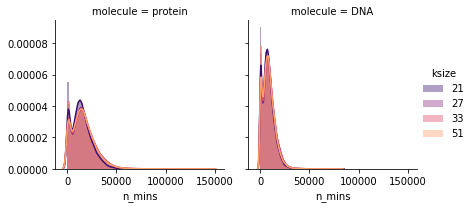

In [93]:
g = sns.FacetGrid(signature_summaries, col='molecule', hue='ksize', palette='magma')
g.map(sns.distplot, 'n_mins')
g.add_legend()

In [88]:
signature_summaries['log10_n_mins'] = np.log10(signature_summaries['n_mins'])
signature_summaries.head()

,ksize,molecule,n_mins,name,log10_n_mins
0,21,protein,24889,cell_ontology_class:cardiac_muscle_cell|tissue:Heart|subtissue:LA/RA|free_annotation:nan|cell_id:G7-MAA100097-3_39_F-1-1,4.396007
1,21,DNA,14002,cell_ontology_class:cardiac_muscle_cell|tissue:Heart|subtissue:LA/RA|free_annotation:nan|cell_id:G7-MAA100097-3_39_F-1-1,4.146190
2,27,protein,27342,cell_ontology_class:cardiac_muscle_cell|tissue:Heart|subtissue:LA/RA|free_annotation:nan|cell_id:G7-MAA100097-3_39_F-1-1,4.436830
3,27,DNA,14704,cell_ontology_class:cardiac_muscle_cell|tissue:Heart|subtissue:LA/RA|free_annotation:nan|cell_id:G7-MAA100097-3_39_F-1-1,4.167435
4,33,protein,28107,cell_ontology_class:cardiac_muscle_cell|tissue:Heart|subtissue:LA/RA|free_annotation:nan|cell_id:G7-MAA100097-3_39_F-1-1,4.448814


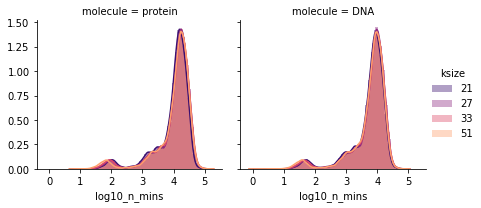

In [92]:
g = sns.FacetGrid(signature_summaries, col='molecule', hue='ksize', palette='magma')
g.map(sns.distplot, 'log10_n_mins')
g.add_legend()

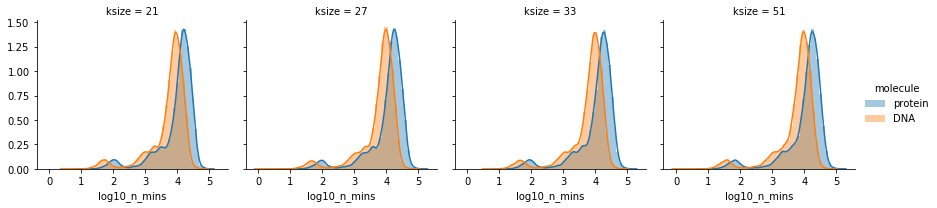

In [91]:
g = sns.FacetGrid(signature_summaries, col='ksize', hue='molecule')
g.map(sns.distplot, 'log10_n_mins')
g.add_legend()

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


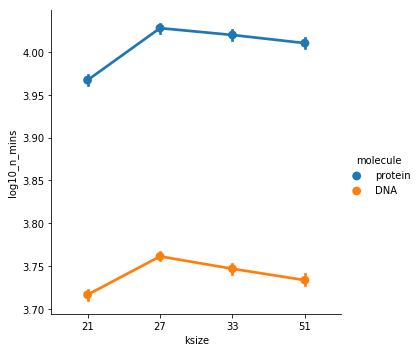

In [94]:
sns.factorplot(x='ksize', y='log10_n_mins', hue='molecule', data=signature_summaries)

In [95]:
write_s3(signature_summaries, 's3://olgabot-maca/facs/signature-summaries.csv')

In [78]:
fastqs = pd.read_csv('s3://olgabot-maca/facs/fastqs.csv')
print(fastqs.shape)
fastqs.head()

(54912, 3)


,sample_id,R1,R2
0,A1-B000126-3_39_F-1-1_S289,s3://czbiohub-maca/remux_data/170925_A00111_0066_AH3TKNDMXX/rawdata/A1-B000126-3_39_F-1-1_S289/A1-B000126-3_39_F-1-1_S289_R1_001.fastq.gz,s3://czbiohub-maca/remux_data/170925_A00111_0067_BH3M5YDMXX/rawdata/A1-B000126-3_39_F-1-1_S289/A1-B000126-3_39_F-1-1_S289_R2_001.fastq.gz
1,A1-B000127-3_38_F-1-1_S1,s3://czbiohub-maca/remux_data/170914_A00111_0058_AH3FYKDMXX/rawdata/A1-B000127-3_38_F-1-1_S1/A1-B000127-3_38_F-1-1_S1_R1_001.fastq.gz,s3://czbiohub-maca/remux_data/170914_A00111_0058_AH3FYKDMXX/rawdata/A1-B000127-3_38_F-1-1_S1/A1-B000127-3_38_F-1-1_S1_R2_001.fastq.gz
2,A1-B000167-3_56_F-1-1_S228,s3://czbiohub-maca/remux_data/170925_A00111_0066_AH3TKNDMXX/rawdata/A1-B000167-3_56_F-1-1_S228/A1-B000167-3_56_F-1-1_S228_R1_001.fastq.gz,s3://czbiohub-maca/remux_data/170925_A00111_0066_AH3TKNDMXX/rawdata/A1-B000167-3_56_F-1-1_S228/A1-B000167-3_56_F-1-1_S228_R2_001.fastq.gz
3,A1-B000168-3_57_F-1-1_S177,s3://czbiohub-maca/remux_data/170925_A00111_0067_BH3M5YDMXX/rawdata/A1-B000168-3_57_F-1-1_S177/A1-B000168-3_57_F-1-1_S177_R1_001.fastq.gz,s3://czbiohub-maca/remux_data/170925_A00111_0067_BH3M5YDMXX/rawdata/A1-B000168-3_57_F-1-1_S177/A1-B000168-3_57_F-1-1_S177_R2_001.fastq.gz
4,A1-B000412-3_56_F-1-1_S110,s3://czbiohub-maca/remux_data/170914_A00111_0058_AH3FYKDMXX/rawdata/A1-B000412-3_56_F-1-1_S110/A1-B000412-3_56_F-1-1_S110_R1_001.fastq.gz,s3://czbiohub-maca/remux_data/170914_A00111_0058_AH3FYKDMXX/rawdata/A1-B000412-3_56_F-1-1_S110/A1-B000412-3_56_F-1-1_S110_R2_001.fastq.gz


In [100]:
cell_metadata_index.head()

column,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
cell_id,,,,,
G7-MAA100097-3_39_F-1-1,cardiac_muscle_cell,nan,LA,Heart,cardiac_muscle_cell (nan)
G7-MAA100097-3_39_F-1-1,cardiac_muscle_cell,nan,LA,Heart,cardiac_muscle_cell (nan)
G7-MAA100097-3_39_F-1-1,cardiac_muscle_cell,nan,LA,Heart,cardiac_muscle_cell (nan)
G7-MAA100097-3_39_F-1-1,cardiac_muscle_cell,nan,LA,Heart,cardiac_muscle_cell (nan)
G7-MAA100097-3_39_F-1-1,cardiac_muscle_cell,nan,LA,Heart,cardiac_muscle_cell (nan)


In [103]:
len(reads_per_cell)

7039

In [106]:
# reads_per_cell

In [104]:
len(cell_metadata_index)

263462

In [109]:
cell_metadata_nodups = cell_metadata.drop_duplicates()
print(cell_metadata_nodups.shape)
cell_metadata_nodups.head()

(43186, 6)


column,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
level_0,,,,,,
0,G7-MAA100097-3_39_F-1-1,cardiac_muscle_cell,nan,LA,Heart,cardiac_muscle_cell (nan)
8,O20-MAA000906-3_11_M-1-1,endothelial_cell,nan,nan,Aorta,endothelial_cell (nan)
16,I4-B001689-3_38_F-1-1,microglial_cell,nan,Hippocampus,Brain_Myeloid,microglial_cell (nan)
26,L14-MAA000652-3_10_M-1-1,precursor_B_cell,pre-B_cell_,B-cells,Marrow,precursor_B_cell (pre-B_cell_)
28,O6-B002777-3_39_F-1-1,keratinocyte,differentiated_keratinocyte,nan,Tongue,keratinocyte (differentiated_keratinocyte)


In [102]:
cell_metadata_index['n_reads'] = reads_per_cell
cell_metadata_index.head()

ValueError: Length of values does not match length of index

In [108]:
read1 = 's3://czbiohub-maca/remux_data/170925_A00111_0066_AH3TKNDMXX/rawdata/A1-B000126-3_39_F-1-1_S289/A1-B000126-3_39_F-1-1_S289_R1_001.fastq.gz'

line_count = ! aws s3 cp $read1 - | wc -l
line_count

['110339']

In [ ]:
n_lines = int(line_count[0])

In [112]:
n_lines_per_read = 4

reads_per_cell = pd.Series()

for cell_id, read1 in tqdm(zip(fastqs.sample_id, fastqs.R1)):
    line_count = ! aws s3 cp $read1 - | wc -l
    n_lines = int(line_count[0])
    n_reads = n_lines/n_lines_per_read
    reads_per_cell[cell_id] = n_reads

4096it [6:18:35,  5.55s/it]

ValueError: invalid literal for int() with base 10: "download failed: s3://czbiohub-maca/remux_data/170914_A00111_0058_AH3FYKDMXX/rawdata/B12-B001960-3_56_F-1-1_S71/B12-B001960-3_56_F-1-1_S71_R1_001.fastq.gz to - HTTPSConnectionPool(host='czbiohub-maca